<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-и-подготовка-к-работе" data-toc-modified-id="Изучение-данных-и-подготовка-к-работе-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных и подготовка к работе</a></span><ul class="toc-item"><li><span><a href="#Методы-и-константы" data-toc-modified-id="Методы-и-константы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Методы и константы</a></span></li><li><span><a href="#Общая-информация-о-датасете-и-данных." data-toc-modified-id="Общая-информация-о-датасете-и-данных.-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Общая информация о датасете и данных.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Новые-признаки" data-toc-modified-id="Новые-признаки-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Новые признаки</a></span></li><li><span><a href="#Обработка-и-очистка-данных" data-toc-modified-id="Обработка-и-очистка-данных-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Обработка и очистка данных</a></span></li></ul></li></ul></li><li><span><a href="#Обучение-алгоритмов" data-toc-modified-id="Обучение-алгоритмов-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение алгоритмов</a></span><ul class="toc-item"><li><span><a href="#Подготовка-выборок" data-toc-modified-id="Подготовка-выборок-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка выборок</a></span></li><li><span><a href="#Дисбаланс-классов." data-toc-modified-id="Дисбаланс-классов.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Дисбаланс классов.</a></span></li><li><span><a href="#Обучение-алгоритмов.Кросс-валидация-и-пайплайн." data-toc-modified-id="Обучение-алгоритмов.Кросс-валидация-и-пайплайн.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обучение алгоритмов.Кросс-валидация и пайплайн.</a></span><ul class="toc-item"><li><span><a href="#Проверка-лучшей-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-лучшей-модели-на-тестовой-выборке-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Проверка лучшей модели на тестовой выборке</a></span></li></ul></li><li><span><a href="#Обучение-алгоритмов-на-отложенной-выборке" data-toc-modified-id="Обучение-алгоритмов-на-отложенной-выборке-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обучение алгоритмов на отложенной выборке</a></span></li></ul></li><li><span><a href="#Итоги-и-выводы" data-toc-modified-id="Итоги-и-выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Итоги и выводы</a></span></li></ul></div>

# Описание проекта

В вашем распоряжении набор данных с разметкой о токсичности правок клиентов Интернет-магазина «Викишоп».  

Интернет-магазин запускает новый сервис, где пользователи могут редактировать и дополнять описания товаров. 

Содержание: клиенты предлагают свои правки и комментируют изменения других. 

Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

# Цель:

Необходимо подготовить и обучить модель классифицировать комментарии на позитивные и негативные. 

Модель должна показать значение метрики качества `F1` не меньше 0.75. 

# Описание данных

Данные находятся в файле `/datasets/toxic_comments.csv`. 
 
- столбец `text` - в нём содержит текст комментария,

- столбец  `toxic` — целевой признак.

# Краткий план работы:

- Загрузить и подготовить данные.

- Обучить разные модели.

- Подготовить выводы.

## Изучение данных и подготовка к работе

Настроим окружение: импортируем все необходимые библиотеки.

In [1]:
pip install -U imbalanced-learn

In [2]:
!pip install nltk

In [3]:
# Стандартные библиотеки
import os
import time
import string

# Библиотеки для обработки данных
import numpy as np
import pandas as pd

from scipy.sparse import hstack

# Визуализация данных
import seaborn as sns
import matplotlib.pyplot as plt

# Модели машинного обучения
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    StratifiedKFold,
    cross_val_score,
)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, make_scorer, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Балансировка классов
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Импорты библиотек и загрузка необходимых ресурсов NLTK
import nltk
import re
from nltk.corpus import stopwords as nltk_stopwords, wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

stopwords_language = 'english'
stopwords = set(nltk_stopwords.words(stopwords_language))

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Методы и константы

In [4]:
random_seed = 123

In [5]:
def density_plot(data, new_features):    
    for key, value in new_features.items():        
        # График плотности для "Not toxic" (нетоксичные)
        sns.kdeplot(data.loc[data['toxic'] == 0][key], color='c', label='Not toxic', fill=True)        
        # График плотности для "Toxic" (токсичные)
        sns.kdeplot(data.loc[data['toxic'] == 1][key], color='r', label='Toxic', fill=True)
        plt.xlabel(value)        
        plt.ylabel('Плотность')        
        plt.title(f'График плотности для признака "{key}"')        
        plt.legend()        
        plt.show()

In [6]:
# Функция для определения части речи в WordNet для лемматизации
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()    
    tag_dict = {"J": 'a',  # Прилагательное
                "N": 'n',  # Существительное
                "V": 'v',  # Глагол
                "R": 'r'}  # Наречие
    
    return tag_dict.get(tag, 'n')  # По умолчанию используется существительное (Noun)

def preprocess_text(text):
    text = text.lower()
    text = text.replace('\n', ' ')
    word_list = re.sub(r"[^a-z ]", '', text).split()

    # Лемматизация слов с учетом частей речи
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in word_list]
    # Склейка лемматизированных слов обратно в текст
    lemmatized_text = ' '.join(lemmatized_words)

    return lemmatized_text

<a id = 'df'></a>

In [1]:
class ModelEvaluator:
    """
    Класс для оценки моделей машинного обучения на различных датасетах и методах балансировки данных.
    """
    
    def __init__(self):
        """
        Инициализация объекта ModelEvaluator.
        """        
        self.X_train = None        
        self.y_train = None        
        self.best_params = {}        
        self.best_model = None        
        self.best_model_fit = []
                
    # Метод для разделения данных на признаки и целевую переменную
    def select_target(self, data):
        """
        Метод для разделения данных на признаки и целевую переменную и создания датасетов.        
        Args:
            data (pd.DataFrame): Исходный датасет.
        Returns:
            X_y_set (list): Список с четырьмя элементами: 
                - features_train: признаки обучающего набора,
                - target_train: целевая переменная обучающего набора,
                - features_test: признаки тестового набора,
                - target_test: целевая переменная тестового набора.
        """
        
        X = data.drop('toxic', axis=1)        
        y = data['toxic']        
        features_train, features_test, target_train, target_test = \
        train_test_split(X, y, test_size=0.2, random_state=random_seed, shuffle = True)        
        # контейнер для датасетов 
        X_y_set = [features_train, target_train, features_test, target_test]        
        return X_y_set       
    
    # создание и настройка пайплайна
    def build_pipeline(self, resampling_method_name, algorithm):
        """
        Создает и настраивает пайплайн обработки данных и модели.        
        Args:
            resampling_method_name (str): Название метода балансировки данных.
            algorithm: Объект алгоритма машинного обучения.
        Returns:
            pipeline: Пайплайн обработки данных и модели.
        """
        
        numeric_cols = ['word_count', 'unique_word_count', 'stop_word_count', 
                        'mean_length_word', 'punctuation_count']        
        text_cols = 'cleaned_text'        
        stopwords_list = list(stopwords)
        
        # Преобразования для текстовых и числовых столбцов
        text_transformer = TfidfVectorizer(stop_words=stopwords_list, ngram_range=(1, 1), max_features=1)        
        numeric_transformer = StandardScaler()            
        # Список преобразователей, которые будут применяться к данным в зависимости от их типа
        transformers = []        
        transformers.append(('text', text_transformer, text_cols))        
        if all(col in self.X_train.columns for col in numeric_cols):            
            transformers.append(('numeric', numeric_transformer, numeric_cols))
        # Объект ColumnTransformer, который будет выполнять соответствующие преобразования
        preprocessor = ColumnTransformer(transformers=transformers, remainder='passthrough')         
        # Если указан метод балансировки данных, добавим соответствующий шаг
        if resampling_method_name != 'No Resampling':            
            resampler = resampling_methods[resampling_method_name]             
        else:            
            resampler = None        
        pipe = Pipeline([('prep', preprocessor),
                 ('resampling', resampler),
                 ('algorithm', algorithm)])      
        pipe.fit(self.X_train, self.y_train)    
        return pipe
    
    # Метод выполняет общий процесс обучения и оценки модели
    def train_and_evaluate_model(self, dataset_name, algorithm, X_y_set, param_grid, resampling_method_name): 
        """
        Обучает модель, оценивает ее производительность и возвращает метрики, лучшую модель и лучшие параметры.
        Args:
            algorithm: Объект алгоритма машинного обучения.
            X_y_set (list): Список с четырьмя элементами: 
                - features_train: признаки обучающего набора,
                - target_train: целевая переменная обучающего набора,
                - features_test: признаки тестового набора,
                - target_test: целевая переменная тестового набора.
            param_grid: Словарь с гиперпараметрами для настройки модели.
            dataset_name (str): Название датасета.
            resampling_method_name (str): Название метода балансировки данных.
        Returns:
            row_tab_metrics (list): Список с метриками производительности модели.                  
        """
        
        # Присвоим значения из X_y_set   
        self.X_train = X_y_set[0].copy()        
        self.y_train = X_y_set[1].copy()       
        # Обучение модели и получение лучшей модели
        row_tab_metrics = self.train_model(algorithm, param_grid, resampling_method_name, dataset_name)        
        return row_tab_metrics

    # Обучение модели, включая настройку гиперпараметров с использованием кросс-валидации
    def train_model(self, algorithm, param_grid, resampling_method_name, dataset_name): 
        """
        Обучает модель, настраивает гиперпараметры с использованием кросс-валидации и возвращает лучшую модель и параметры.
        Args:
            algorithm: Объект алгоритма машинного обучения.
            param_grid: Словарь с гиперпараметрами для настройки модели.
            resampling_method_name (str): Название метода балансировки данных.
            dataset_name (str): Название датасета.
        Returns:
            row_tab_metrics (list): Список с метриками производительности модели. 
        """
                
        # Создание объекта StratifiedKFold для стратифицированной кросс-валидации
        stratified_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=random_seed)        
        self.stratified_cv = stratified_cv        
        grid_search = GridSearchCV(self.build_pipeline(resampling_method_name, algorithm), param_grid, 
                                   scoring = 'f1', cv=self.stratified_cv, n_jobs=-1, error_score='raise')       
        best_model = grid_search.fit(self.X_train, self.y_train).best_estimator_
        time_fit = grid_search.refit_time_  
        # Получение лучших параметров
        best_params = grid_search.best_params_        
        self.best_params = best_params
        self.best_model = best_model        
        # Рассчитываем стандартное отклонение F1-меры
        std_cv_f1 = grid_search.cv_results_['std_test_score'][grid_search.best_index_]        
        self.std_cv_f1 = std_cv_f1        

        # Обучение модели с лучшими параметрами
        self.best_model.fit(self.X_train, self.y_train)        
        start_time_prediction = time.time()
        # Предсказание с моделью с лучшими параметрами
        y_pred = self.best_model.predict(self.X_train)       
        end_time_prediction = time.time()
        time_prediction = end_time_prediction - start_time_prediction 
        # Оценка модели и вычисление метрик и вывод параметров лучшей моедели        
        best_f1_fit = self.best_model.score(self.X_train, self.y_train)         
        best_f1_fit_rounded = round(best_f1_fit, 4)        

        print(f'Параметры лучшей модели алгоритма {algorithm}', self.best_params)        
        # Получаем имя алгоритма
        algorithm_name = algorithm.__class__.__name__ 
        # Заполняем строку таблицы
        row_tab_metrics = [algorithm_name, dataset_name, resampling_method_name, best_f1_fit_rounded, 
                           time_fit, time_prediction, self.std_cv_f1] 
        return row_tab_metrics   
    
    # метод переберет наборы данных, передаст в обучающий метод параметры алгоритма
    def evaluate_models(self, datasets, algorithm, param_grid, resampling_methods):
        """
        Оценивает производительность модели на нескольких датасетах и с разными методами балансировки данных.
        Args:
            datasets (dict): Словарь с датасетами для оценки.
            algorithm: Объект алгоритма машинного обучения.
            param_grid: Словарь с гиперпараметрами для настройки модели.
            resampling_methods (dict): Словарь с методами балансировки данных.
        Returns:
            tab_metrics (pd.DataFrame): Датафрейм с метриками производительности модели.
            self.best_model_fit (list): Список лучших моделей.
        """
        
        for resampling_method_name, resampling_method in resampling_methods.items():            
            for dataset_name, dataset in datasets.items():
                # Вызов метода train_and_evaluate_model для обучения и оценки
                metrics_tab = self.train_and_evaluate_model(dataset_name, algorithm, dataset, 
                                                            param_grid, resampling_method_name)    
                # Добавление метрики в таблицу tab_metrics
                tab_metrics.loc[len(tab_metrics.index)] = metrics_tab     
                # Добавление лучших моделей в список
                self.best_model_fit.append(self.best_model)         
        return tab_metrics, self.best_model_fit 
    
    # метод проверит результаты работы лучшего алгоритма на тестовой выборке                    
    def test_best_model(self, X_y_set, best_model):
        
        """
    Проверяет результаты работы лучшего алгоритма на тестовой выборке.
    Args:
        X_y_set: Кортеж с обучающей и тестовой выборками, содержащий признаки и метки классов.
        best_model: Лучшая обученная модель.
    Returns:
        None
    """
        
        start_time_prediction = time.time()
        y_pred = best_model.predict(X_y_set[2])        
        # Вычисление F1 на тестовой выборке
        test_f1 = f1_score(X_y_set[3], y_pred)
        end_time_prediction = time.time() 
        
        # Вывод результата F1-меры на тестовой выборке и времени предсказания        
        print(f'Test f1:  {test_f1:.4f}')        
        print('Prediction Time', end_time_prediction - start_time_prediction)

In [130]:
class TextClassifier:
    """
    Класс для обучения и оценки моделей классификации текстовых данных  на отложенных выборках.
    Args:
        data: Кортеж данных, содержащий обучающие и тестовые выборки и соответствующие метки классов.
        classifier: Модель классификатора, которую необходимо обучить.
        random_seed:  для воспроизводимости результатов.
    Attributes:
        data: Исходные данные.
        random_seed: Заданное случайное значение.
        stopwords_list: Список стоп-слов для удаления из текста.
        tf_idf: Векторизатор TF-IDF для текстовых данных.
        imbalanced_methods: Список методов балансировки классов.
        classifier: Модель классификатора.
        results: Таблица для хранения результатов оценки моделей.
    Methods:
        split_data(): Разделение данных на обучающую, валидационную и тестовую выборки.
        vectorize_data(X_train, X_val, X_test): Векторизация текстовых данных с использованием TF-IDF.
        evaluate_logistic_regression(X_train, y_train, imbalanced_method): Оценка производительности модели Logistic Regression.
        train_model(X_train, y_train): Обучение модели на данных.
        predict_validation(X_val): Получение прогнозов на валидационной выборке.
        predict_test(X_test): Получение прогнозов на тестовой выборке.
        evaluate_performance(y_true, y_pred): Оценка производительности модели с использованием F1-меры.
        train_and_evaluate(imbalanced_method): Обучение, оценка производительности и сохранение результатов.
        test_best_model(X_y_set, best_model): Проверка результатов работы лучшей модели на тестовой выборке.
    """

    
    def __init__(self, data, classifier, random_seed=random_seed):
        
        # Инициализация класса с данными, классификатором и случайным числом
        self.data = data        
        self.random_seed = random_seed        
        self.stopwords_list = list(stopwords)        
        self.tf_idf = TfidfVectorizer(stop_words=self.stopwords_list)        
        self.imbalanced_methods = ['None', 'RandomOverSampler', 'SMOTE', 'RandomUnderSampler']        
        self.classifier = classifier        
        self.results = pd.DataFrame(columns=['Алгоритм', 'Метод балансировки данных', 
                                             'F1 на валидац выборке', 'F1 тестовой выборке'])
        

    def split_data(self):
        """
        Разделяет данные на обучающую, валидационную и тестовую выборки.
        Returns:
            Кортеж с признаками и метками для обучающей, валидационной и тестовой выборок.
        """
        
        X_set_train, X_set_val, y_set_train, y_set_val = train_test_split(self.data[0], self.data[1], 
                                                                          test_size=0.2, random_state=self.random_seed)
        X_set_test, y_set_test = self.data[2], self.data[3]        
        return X_set_train, X_set_val, y_set_train, y_set_val, X_set_test, y_set_test

    def vectorize_data(self, X_train, X_val, X_test):
        """
        Векторизирует текстовые данные с использованием TF-IDF.
        Args:
            X_train: Данные для обучения.
            X_val: Данные для валидации.
            X_test: Данные для тестирования.
        Returns:
            TF-IDF векторы для обучающей, валидационной и тестовой выборок.
        """
        
        self.tf_idf.fit(X_train['cleaned_text'].values)        
        tf_idf_train = self.tf_idf.transform(X_train['cleaned_text'].values)        
        tf_idf_val = self.tf_idf.transform(X_val['cleaned_text'].values)        
        tf_idf_test = self.tf_idf.transform(X_test['cleaned_text'].values)        
        return tf_idf_train, tf_idf_val, tf_idf_test

    def evaluate_logistic_regression(self, X_train, y_train, imbalanced_method):
        """
        Оценивает производительность алгоритмов машинного обучения с разными методами балансировки.
        Args:
            X_train: Обучающая выборка.
            y_train: Метки классов для обучения.
            imbalanced_method: Метод балансировки классов.
        Returns:
            X_resampled: Балансированные признаки обучающей выборки.
            y_resampled: Балансированные метки классов обучения.
        """
        if imbalanced_method == 'RandomOverSampler':            
            resampler = RandomOverSampler(random_state=self.random_seed)            
        elif imbalanced_method == 'SMOTE':            
            resampler = SMOTE(random_state=self.random_seed)            
        elif imbalanced_method == 'RandomUnderSampler':            
            resampler = RandomUnderSampler(random_state=self.random_seed)            
        else:            
            resampler = None 
        if resampler is not None:            
            X_resampled, y_resampled = resampler.fit_resample(X_train, y_train)            
        else:            
            X_resampled, y_resampled = X_train, y_train
        return X_resampled, y_resampled

    def train_model(self, X_train, y_train):
        """
        Обучает классификатор на данных.
        Args:
            X_train: Обучающая выборка.
            y_train: Метки классов для обучения.
        Returns:
            None
        """
        self.classifier.fit(X_train, y_train)

    def predict_validation(self, X_val):
        """
        Получает прогнозы на валидационной выборке.
        Args:
            X_val: Валидационная выборка.
        Returns:
            Прогнозы классификации.
        """
        return self.classifier.predict(X_val)

    def predict_test(self, X_test):
        """
        Получает прогнозы на тестовой выборке.
        Args:
            X_test: Тестовая выборка.
        Returns:
            Прогнозы классификации.
        """
        return self.classifier.predict(X_test)

    def evaluate_performance(self, y_true, y_pred):
        """
        Оценивает производительность модели с использованием F1-меры.
        Args:
            y_true: Истинные метки классов.
            y_pred: Прогнозы классификации.
        Returns:
            F1-мера.
        """
        return f1_score(y_true, y_pred)

    def train_and_evaluate(self, imbalanced_method):
        """
        Обучает, оценивает производительность и сохраняет результаты.
        Args:
            imbalanced_method: Метод балансировки классов.
        Returns:
            Таблица с результатами оценки производительности модели.
        """
        X_train, X_val, y_train, y_val, X_test, y_test = self.split_data()        
        tf_idf_train, tf_idf_val, tf_idf_test = self.vectorize_data(X_train, X_val, X_test)        
        X_resampled, y_resampled = self.evaluate_logistic_regression(tf_idf_train, y_train, imbalanced_method)        
        self.train_model(X_resampled, y_resampled)        
        y_pred_val = self.predict_validation(tf_idf_val)        
        f1_score_val = self.evaluate_performance(y_val, y_pred_val)        
        y_pred_test = self.predict_test(tf_idf_test)        
        f1_score_test = self.evaluate_performance(y_test, y_pred_test)
        
        # Добавление результатов в таблицу
        self.results = self.results.append({
            'Алгоритм': self.classifier.__class__.__name__,  
            'Метод балансировки данных': imbalanced_method,  
            'F1 на валидац выборке': f1_score_val,
            'F1 тестовой выборке': f1_score_test
        }, ignore_index=True)        
        return self.results

### Общая информация о датасете и данных.

Ознакомимся с данными таблицы и их структурой.

Загрузим в датафрейм данные, с которыми будем работать.

Посмотрим на несколько первых записей в датафрейме c помощью метода head().

Выведем общую информацию по таблице c помощью метода info().

In [8]:
pth1 = '/datasets/toxic_comments.csv'
pth2 = 'toxic_comments.csv'

# Проверка наличия файла в путях и считывание данных в DataFrame df
if os.path.exists(pth1):    
    df = pd.read_csv(pth1)    
elif os.path.exists(pth2):    
    df = pd.read_csv(pth2)    
else:    
    print('Something is wrong') 

In [9]:
df.head()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


In [10]:
df = df.set_index('Unnamed: 0')
df

,text,toxic
Unnamed: 0,,
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
...,...,...
159446,""":::::And for the second time of asking, when ...",0
159447,You should be ashamed of yourself \n\nThat is ...,0
159448,"Spitzer \n\nUmm, theres no actual article for ...",0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


Типы данных в датафрейме:

Категориальные: `toxic` (`int64`).

Количественные: нет.
    
Строковые:`text` (`object`)

Логические: логических нет.

Дата: нет.

В датафрейме 159292 объектов и 2 признака (характеристика) для них.

Целевой признак `toxic`.

Пропусков нет.

Текс английский, неочищенный.

In [12]:
df.columns

Index(['text', 'toxic'], dtype='object')

Названия столбцов записаны корректно, используется один регист, пробелов нет.

In [13]:
print("Число дубликатов в df:", df.duplicated().sum())

Число дубликатов в df: 0


In [14]:
print("Число неявных дубликатов в df:", df['text'].duplicated().sum())

Число неявных дубликатов в df: 0


In [15]:
df['toxic'].unique()

array([0, 1], dtype=int64)

Уникальные значения целевого признака `toxic` - это `0` и `1`. 

Решаем задачу бинарной классификации.

Посмотрим на баланс классов.

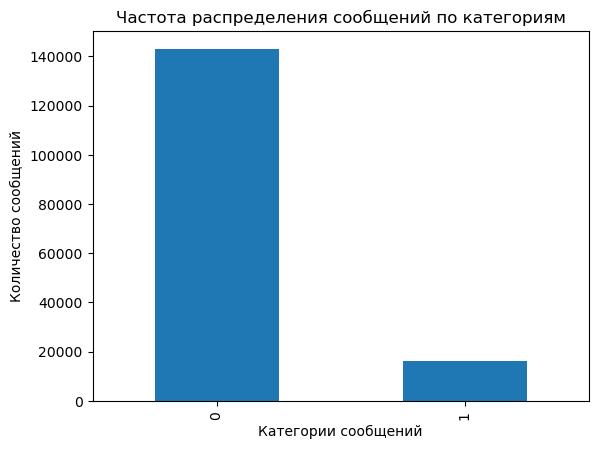

In [16]:
df['toxic'].value_counts().plot(kind='bar')
plt.xlabel("Категории сообщений")    
plt.ylabel("Количество сообщений")
plt.title("Частота распределения сообщений по категориям")    
plt.show()

Наблюдаем бисбаланс классов целевого признака. Это может привести к переобучению модели.

**Вывод**

Данные загружены.

Пропусков данных нет.

Дубликатов нет.

Целевой признак опредлен - `toxic`.

Решаем задачу бинарной классификации.

Наблюдаем в целевом признаке дисбаланс классов.

Задачи следующих разделов:

- устраним бисбаланс классов,

- добавим новые признаки,

- предобработаем текс в столбце `text`: 

    - очистим сообщения от лишних символов, 
    
    - приведем слова в сообщениях к нижнему регистру, 
    
    - лемматизация текста.

<a id = 'доп_признаки'></a>

### Предобработка данных

#### Новые признаки

Добавим столбцы:

- количество слов в сообщении,

- количество уникальных слов в сообщении,

- средняя длина слов в сообщении.

Посмотрим имеются ли отличия по этим показателям у токсичных и не токсичных сообщений.

Содадим новый датафрейм, куда будем добавлять дополнительные признаки.

In [17]:
df_new = df.copy()

df_new['word_count'] = df_new['text'].apply(lambda x: len(str(x).split()))
df_new['unique_word_count'] = df_new['text'].apply(lambda x: len(pd.unique(x.split())))
df_new['mean_length_word'] = df_new['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
# Округление значения до двух знаков после запятой
df_new['mean_length_word'] = df_new['mean_length_word'].round(2)

Визуализируем данные, построим график плотности вероятности. Вызовем метод `density_plot()`.

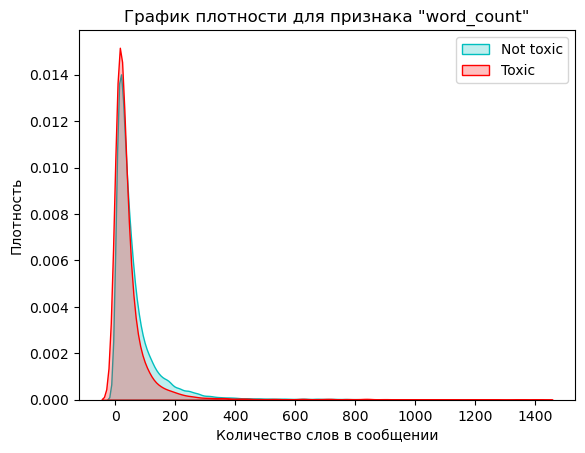

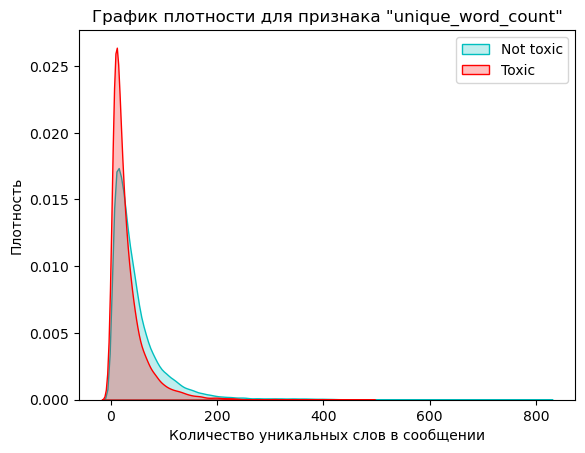

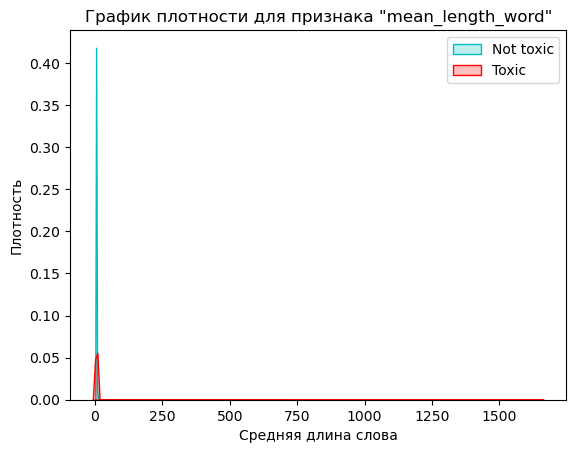

In [18]:
new_features = {'word_count':'Количество слов в сообщении', 
                'unique_word_count':'Количество уникальных слов в сообщении', 
                'mean_length_word':'Средняя длина слова'}
density_plot(df_new, new_features)

Графики показывают,что плотность вероятности количества слов в токсичных сообщения немного выше чем у нетоксичных сообщений (этот признак может быть мало информативным), количества уникальных слов в тосичных сообщениях больше, а средней длины слова значительно меньше.

Токсичные сообщения, как правило, это эмоциональные сообщения, а значит могут отличаться количество стоп-слов и знаков препинания.

Добавим столбцы с количеством стоп-слов и знаков препинания. Расмотрим эти новые признаки на графике плотности вероятности. Вызовем метод `density_plot()`.

In [19]:
df_new['stop_word_count'] = df_new['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stopwords]))
df_new['punctuation_count'] = df_new['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

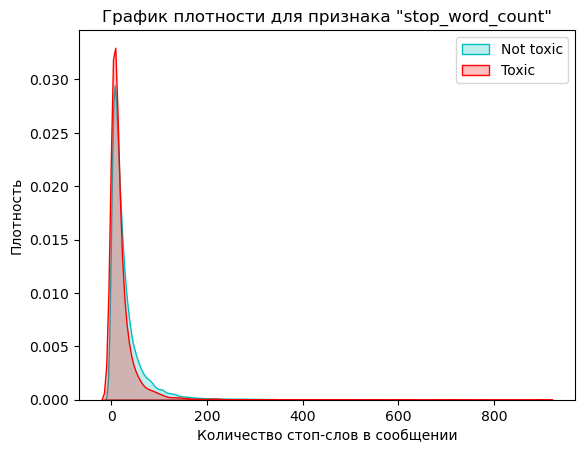

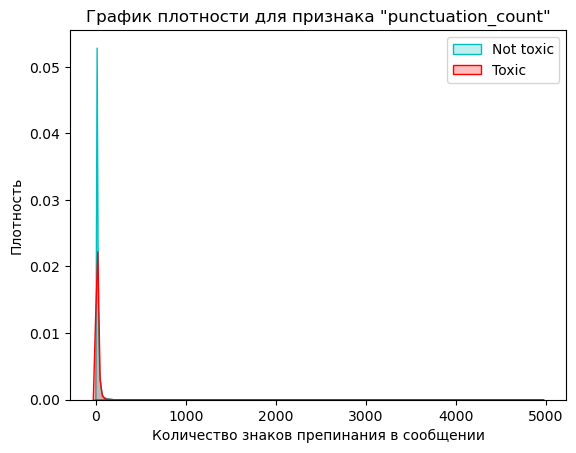

In [20]:
new_features = {'stop_word_count':'Количество стоп-слов в сообщении', 
                'punctuation_count':'Количество знаков препинания в сообщении'}
density_plot(df_new, new_features)

In [21]:
df_new = df_new.drop('text', axis=1)

Прогноз не оправдался, писатели токсичных сообщений оказались скупы на стоп-слова и знаки препинания. Плотность вероятности в токсичных сообщения стоп-слов чуть выше, чем в нетоксичных, а знаков препинания в несколько раз меньше.

Можно предположить, что признак "количество стоп-слов" будет малоинформативным.

**Вывод**

Добавили новые признаки:

- `word_count`: количество слов в тексте.

- `unique_word_count`: количество уникальных слов в тексте.

- `mean_length_word`: средняя длина слова в тексте (округленная до двух знаков после запятой).

- `stop_word_count`: количество стоп-слов в тексте.

- `punctuation_count`: количество знаков препинания в тексте.

Вероятнее всего два признака "количество слов в сообщении" и "количество стоп-слов" будут малоинформативны.

<a id = 'обработка_текста'></a>

#### Обработка и очистка данных

Для очистки сообщений от знаков препиная, символов и лемматизации слов вызовем методы  `clear()` и `preprocess_text()`.

In [22]:
# Инициализация объекта для лемматизации слов с помощью WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
# Применение функции preprocess_text к столбцу с английским текстом
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [23]:
df = df.drop('text', axis=1)

In [24]:
df

,toxic,cleaned_text
Unnamed: 0,,
0,0,explanation why the edits make under my userna...
1,0,daww he match this background colour im seemin...
2,0,hey man im really not try to edit war it just ...
3,0,more i cant make any real suggestion on improv...
4,0,you sir be my hero any chance you remember wha...
...,...,...
159446,0,and for the second time of ask when your view ...
159447,0,you should be ashamed of yourself that be a ho...
159448,0,spitzer umm there no actual article for prosti...


In [25]:
print('Количество строк - объектов с пропусками', df.isnull().sum().sum())    
print('Процент пропусков по всему датафрейму', (df.isnull().sum().sum ()/len(df)*100).round(2))  

pd.DataFrame({'процент пропусков':round((df.isna().mean()*100), ), 
              'количество пропусков': df.isnull().sum()}).sort_values(by = 'процент пропусков').tail(15) 

Количество строк - объектов с пропусками 0
Процент пропусков по всему датафрейму 0.0


,процент пропусков,количество пропусков
toxic,0.0,0
cleaned_text,0.0,0


In [26]:
df_new['cleaned_text'] = df['cleaned_text']

In [27]:
df_new

,toxic,word_count,unique_word_count,mean_length_word,stop_word_count,punctuation_count,cleaned_text
Unnamed: 0,,,,,,,
0,0,43,41,5.16,18,10,explanation why the edits make under my userna...
1,0,17,17,5.59,2,12,daww he match this background colour im seemin...
2,0,42,39,4.57,20,6,hey man im really not try to edit war it just ...
3,0,113,82,4.49,56,21,more i cant make any real suggestion on improv...
4,0,13,13,4.23,5,5,you sir be my hero any chance you remember wha...
...,...,...,...,...,...,...,...
159446,0,47,44,5.21,19,18,and for the second time of ask when your view ...
159447,0,18,18,4.39,11,4,you should be ashamed of yourself that be a ho...
159448,0,12,12,5.58,2,4,spitzer umm there no actual article for prosti...


In [28]:
df_new.corr(numeric_only=True).round(4)

,toxic,word_count,unique_word_count,mean_length_word,stop_word_count,punctuation_count
toxic,1.0000,-0.0493,-0.0920,0.0108,-0.0585,-0.0122
word_count,-0.0493,1.0000,0.9365,-0.0104,0.9699,0.5699
unique_word_count,-0.0920,0.9365,1.0000,-0.0137,0.9342,0.5361
mean_length_word,0.0108,-0.0104,-0.0137,1.0000,-0.0155,0.1594
stop_word_count,-0.0585,0.9699,0.9342,-0.0155,1.0000,0.5205
punctuation_count,-0.0122,0.5699,0.5361,0.1594,0.5205,1.0000


Столбцы были подобраны неудачно, три новых столбца показывают высокую корреляцию между собой (`word_count`, `unique_word_count`	и  `stop_word_count`). Высокая корреляция может затруднить линейным моделям интерпретацию весов признаков и привести к нестабильным оценкам параметров модели. В то же время корреляция может отражать естественную зависимость между признаками. Оставим эти признаки, позже проверим их влияние на результат работы алгоритмов.

**Вывод**

Выполнили предобработку текста:

Удалили знаки препинания и символы из текста.

Привели текст к нижнему регистру.

Применили лемматизацию к тексту с использованием `WordNetLemmatizer`.

In [ ]:
numeric_cols = ['word_count', 'unique_word_count', 'stop_word_count', 
                'mean_length_word', 'punctuation_count']
text_cols = 'cleaned_text'

from imblearn.pipeline import Pipeline # Корректной работы классов из imblearn нужен Pipeline из той же библиотеки.

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(),  text_cols),   # Apply TfIdf vectorization to text features
        ('numeric', StandardScaler(), numeric_cols)   # Apply StandardScaler to numeric features
    ])
resampler = SMOTE(random_state=random_seed)
pipe = Pipeline([('prep', preprocessor),
                 ('resampling', resampler),
                 ('clf', LogisticRegression())])

In [ ]:
X = df_new.drop('toxic', axis=1)
y = df_new['toxic']
features_train, features_test, target_train, target_test = \
        train_test_split(X, y, test_size=0.2, random_state=random_seed, shuffle = True)        

In [ ]:
pipe.fit(features_train, target_train)

In [ ]:
pred = pipe.predict(features_test)
score = f1_score(pred, target_test)
score

## Обучение алгоритмов

<a id = 'подготовка_выборок'></a>

### Подготовка выборок

Выделим независимые признаки и целевой признак toxic. Вызовем метод `select_target()` и получим наборы выборок.

Напомним, что у нас есть две выборки:

`df` - исходный датасет с обработанным текстом сообщений,

`df_new` - датасет с обработанным текстом сообщений и дополнительными признаками.

In [60]:
model_evaluator = ModelEvaluator()

In [30]:
X_y_df = model_evaluator.select_target(df)

Проверим размеры полученных выборок в наборах, где

под индексом - 0 - тренировочная выборка независимых признаков,

под индексом 1 - целевой признак тренировочной выборки,

под индексом 2 - тестовая выборка независимых признаков,

под индексом 3 - целевой признак тестовой выборки.

In [31]:
(X_y_df[0].shape[0], X_y_df[0].shape[1],  X_y_df[1].shape, X_y_df[2].shape[0], X_y_df[2].shape[1], X_y_df[3].shape)

(127433, 1, (127433,), 31859, 1, (31859,))

In [90]:
X_y_df[0]

,cleaned_text
Unnamed: 0,
77207,please be inform that like fellow eli soriano ...
50390,the horrible please dont deleate this it be no...
61926,i will appreciate it ifwhen proponent of consp...
31543,thanks a lot talk
30938,i know there be few usable source now but that...
...,...
146605,new incarnation need a picture of the batman v...
120011,youre not answer my problem what be this block...
17747,what who the hell write this synopsis


In [32]:
X_y_df_new = model_evaluator.select_target(df_new)

In [33]:
(X_y_df_new[0].shape[0], X_y_df_new[0].shape[1],  X_y_df_new[1].shape, X_y_df_new[2].shape[0], 
 X_y_df_new[2].shape[1], X_y_df_new[3].shape)

(127433, 6, (127433,), 31859, 6, (31859,))

In [91]:
X_y_df_new[0]

,word_count,unique_word_count,mean_length_word,stop_word_count,punctuation_count,cleaned_text
Unnamed: 0,,,,,,
77207,141,106,5.42,55,31,please be inform that like fellow eli soriano ...
50390,25,24,4.48,12,7,the horrible please dont deleate this it be no...
61926,122,99,5.28,53,38,i will appreciate it ifwhen proponent of consp...
31543,6,6,2.83,1,3,thanks a lot talk
30938,108,83,4.58,59,6,i know there be few usable source now but that...
...,...,...,...,...,...,...
146605,20,17,5.45,6,9,new incarnation need a picture of the batman v...
120011,74,56,4.54,44,19,youre not answer my problem what be this block...
17747,7,7,4.71,3,2,what who the hell write this synopsis


**Вывод**

Выделили независимые признаки и целевой признак toxic

Получили информацию о размерности данных в обучающих и тестовых наборах как для исходных данных, так и для данных с новыми признаками и предобработкой текста. 

<a id = 'дисбаланс_классов'></a>

<a id = 'дисбаланс_классов'></a>

### Дисбаланс классов. 

На примере модели `Logistic Regression` сравним производительность модели при использовании разных методов борьбы с дисбалансом. Выберем наилучший метод для дальнейшего использования в нашей задаче классификации.

Так как у методов борьбы с дисбалансом есть недостаток - могут привести к переобучению, то верим модель на адекватность (сравним с предсказанием константной модели).

In [100]:
# Создадим список методов борьбы с дисбалансом
imbalanced_methods = ['None', 'RandomOverSampler', 'SMOTE', 'RandomUnderSampler']

# Метод балансировки классов
def evaluate_logistic_regression(X_y_set, imbalanced_method):    
    # Инициальзируем модель Logistic Regression
    classifier = LogisticRegression(max_iter=1000, random_state=random_seed)
    
    # Создадим объект балансировки классов на основе выбранного метода
    if imbalanced_method == 'RandomOverSampler':        
        resampler = RandomOverSampler(random_state=random_seed)        
    elif imbalanced_method == 'SMOTE':        
        resampler = SMOTE(random_state=random_seed)        
    elif imbalanced_method == 'RandomUnderSampler':        
        resampler = RandomUnderSampler(random_state=random_seed)        
    else:        
        # Без балансировки
        resampler = None  

    # Если используем балансировку классов, применим ее к данным
    if resampler is not None:        
        X_resampled, y_resampled = resampler.fit_resample(X_y_set[0], X_y_set[1])        
    else:        
        X_resampled, y_resampled = X_y_set[0], X_y_set[1]
    return X_resampled, y_resampled, classifier

# Разделение данных на тренировочную, валидационную и тестовую выборки
X_set_train, X_set_val, y_set_train, y_set_val = train_test_split(X_y_df[0], X_y_df[1], test_size=0.2, random_state=random_seed)
X_set_test, y_set_test = X_y_df[2], X_y_df[3]

stopwords_list = list(stopwords)

# Создадим и обучим модель TF-IDF
tf_idf = TfidfVectorizer(stop_words = stopwords_list)
tf_idf.fit(X_set_train['cleaned_text'].values)
tf_idf_train = tf_idf.transform(X_set_train['cleaned_text'].values)
tf_idf_val = tf_idf.transform(X_set_val['cleaned_text'].values)
tf_idf_test = tf_idf.transform(X_set_test['cleaned_text'].values)

# Пройдем по всем методам борьбы с дисбалансом и вычислим F1-меру для Logistic Regression
for method in imbalanced_methods:    
    # Применим метод борьбы с дисбалансом только к тренировочным данным
    X_resampled, y_resampled, classifier = evaluate_logistic_regression((tf_idf_train, y_set_train), method)
    classifier.fit(X_resampled, y_resampled)
    y_pred_val = classifier.predict(tf_idf_val)    
    f1_score_val = f1_score(y_set_val, y_pred_val)
    print(f'Метод: {method}')    
    print(f'Метрика F1 алгоритма Logistic Regression на валидационной выборке: {f1_score_val:.4f}')        
    print('_______________________________________________________________')

Метод: None
Метрика F1 алгоритма Logistic Regression на валидационной выборке: 0.7328
_______________________________________________________________
Метод: RandomOverSampler
Метрика F1 алгоритма Logistic Regression на валидационной выборке: 0.7435
_______________________________________________________________
Метод: SMOTE
Метрика F1 алгоритма Logistic Regression на валидационной выборке: 0.6941
_______________________________________________________________
Метод: RandomUnderSampler
Метрика F1 алгоритма Logistic Regression на валидационной выборке: 0.6924
_______________________________________________________________


Результат проверки на одном из алгоритмов показал, что метод борьбы с дисбалансом `RandomOverSampler` (случайным образом выбирает образцы из меньшего класса и дублирует их до тех пор, пока количество образцов в этом классе не достигнет уровня большего класса) оказался самым эффективным (`F1 мера` - 0.7435).

**Вывод**

Опробовали разные методы балансировки классов, такие как `RandomOverSampler`, `SMOTE`, `RandomUnderSampler`, и `None` (без балансировки), для модели `Logistic Regression`. Оценили производительность каждого метода с помощью метрик `F1`  на валидационных данных. Метод `RandomOverSampler` показал наилучший результат с `F1-мерой` около 0.7495.

<a id = 'обучение_алгоритмов'></a>

### Обучение алгоритмов.Кросс-валидация и пайплайн.

В обучении алгоритмов и поиске оптимальной модели будем использовать следующие выборки в паре с алгоритмами:

In [36]:
# Создаем пустой датафрейм
tab_algorithms = pd.DataFrame()
# Добавляем столбцы
tab_algorithms['Выборки/Алгоритмы'] = ['LogisticRegression', 'LGBMClassifier', 'RandomForestClassifier', 
                                       'XGBClassifier', 'DecisionTreeClassifier']
tab_algorithms['X_y_df'] = ['+',  '+', '+', '+', '+']
tab_algorithms['X_y_df_new'] = ['+', '+', '+', '+', '+']
tab_algorithms = tab_algorithms.set_index('Выборки/Алгоритмы')
tab_algorithms.T

Выборки/Алгоритмы,LogisticRegression,LGBMClassifier,RandomForestClassifier,XGBClassifier,DecisionTreeClassifier
X_y_df,+,+,+,+,+
X_y_df_new,+,+,+,+,+


In [68]:
# создаем накопительную таблицу для сбора данных по всем лучшим моделям алгоритмов
tab_metrics = pd.DataFrame(columns = ['Алгоритм модели', 'Набор данных', 'Метод балансировки данных', 
                                      'F1-мера', 'Время обучения', 'Время предсказания', 'стандартное отклонение F1-мера'])

# создаеем массив лучших моделей
best_model_lr = [] 
best_model_xgb = []
best_model_rf = []
best_model_lgbm = []
best_model_dt = []

In [69]:
# LogisticRegression
logistic_regression_model = LogisticRegression(random_state=random_seed, solver='liblinear', max_iter=150)

# LGBMRegressor
lgbm_model = LGBMClassifier (n_estimators = 10, random_state = random_seed, extra_trees = True)

# Случайный лес Random Forest
random_forest_model = RandomForestClassifier(n_estimators = 10, random_state=random_seed, n_jobs=-1)

# Дерево решений Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=random_seed)

# XGBoost
xgb_model = xgb.XGBClassifier(n_estimators = 10, random_state=random_seed, n_jobs=-1)

In [72]:
#Создание словаря мотодов борьбы с дисбалансом классов
resampling_methods = {
    'No Resampling': None,
    'RandomOverSampler': RandomOverSampler(random_state=random_seed),
    'SMOTE': SMOTE(random_state=random_seed),
    'RandomUnderSampler': RandomUnderSampler(random_state=random_seed)    
}

In [71]:
# Создание словаря выборок 
datasets1 = {'X_y_df': X_y_df, 'X_y_df_new' : X_y_df_new}

In [73]:
# Создание словаря параметров алгоритма LogisticRegression под выборки из datasets1
params_logistic_regression = {'algorithm__C':[5, 10, 15], 'algorithm__penalty' : ['l1', 'l2']}
tab_metrics, best_model_lr = model_evaluator.evaluate_models(datasets1, logistic_regression_model, 
                                                             params_logistic_regression, resampling_methods)

Параметры лучшей модели алгоритма LogisticRegression(max_iter=150, random_state=123, solver='liblinear') {'algorithm__C': 5, 'algorithm__penalty': 'l1'}
Параметры лучшей модели алгоритма LogisticRegression(max_iter=150, random_state=123, solver='liblinear') {'algorithm__C': 5, 'algorithm__penalty': 'l1'}
Параметры лучшей модели алгоритма LogisticRegression(max_iter=150, random_state=123, solver='liblinear') {'algorithm__C': 5, 'algorithm__penalty': 'l1'}
Параметры лучшей модели алгоритма LogisticRegression(max_iter=150, random_state=123, solver='liblinear') {'algorithm__C': 5, 'algorithm__penalty': 'l2'}
Параметры лучшей модели алгоритма LogisticRegression(max_iter=150, random_state=123, solver='liblinear') {'algorithm__C': 5, 'algorithm__penalty': 'l1'}
Параметры лучшей модели алгоритма LogisticRegression(max_iter=150, random_state=123, solver='liblinear') {'algorithm__C': 5, 'algorithm__penalty': 'l1'}
Параметры лучшей модели алгоритма LogisticRegression(max_iter=150, random_state=12

In [75]:
tab_metrics

,Алгоритм модели,Набор данных,Метод балансировки данных,F1-мера,Время обучения,Время предсказания,стандартное отклонение F1-мера
0,LogisticRegression,X_y_df,No Resampling,0.8975,8.372931,7.782815,0.000000
1,LogisticRegression,X_y_df_new,No Resampling,0.8987,8.978689,7.682745,0.003095
2,LogisticRegression,X_y_df,RandomOverSampler,0.3175,9.026121,7.755056,0.000533
3,LogisticRegression,X_y_df_new,RandomOverSampler,0.4344,9.188858,7.495005,0.000948
4,LogisticRegression,X_y_df,SMOTE,0.3175,9.190989,7.661936,0.000533
5,LogisticRegression,X_y_df_new,SMOTE,0.4366,11.244978,8.486834,0.000601
6,LogisticRegression,X_y_df,RandomUnderSampler,0.3175,8.686785,8.132061,0.000533
7,LogisticRegression,X_y_df_new,RandomUnderSampler,0.4277,8.895593,7.627269,0.000898


Данные обучения логистической регрессии показывают, что введение дополнительных признаков не дают значительных изменений качества модели.

Качество моделей с подбором подходящих гипперпараметров на кросс-валидации, как и предполагали улучшилось.

Для модели `Logistic Regression` на обоих наборах данных (`X_y_df` и `X_y_df_new`) без использования методов балансировки классов (`No Resampling`) получены высокие значения `F1-меры` (около 0.8975 и 0.8987 соответственно). Это говорит о хорошей производительности модели на несбалансированных данных.

Однако использование методов балансировки классов приводит к ухудшению производительности модели `Logistic Regression`. Например, при использовании `RandomOverSampler` `F1-мера` падает до 0.3175 для обоих наборов данных.

Поскольку стандартное отклонение `F1-меры` в данной таблице имеет небольшие значения (например, 0.003095 или 0.000533), это может говорить о том, что результаты модели с одним и тем же методом и разным набором данных в основном согласованы и не сильно различаются при различных запусках. Это хороший признак стабильности и предсказуемости модели при работе с данными и методами балансировки классов.

In [76]:
# Создание словаря параметров алгоритма LGBMClassifier под выборки из datasets1
params_lgbm = {'algorithm__learning_rate' : [0.2, 0.4], 'algorithm__max_depth': range(7, 11, 2)}
tab_metrics, best_model_lgbm = model_evaluator.evaluate_models(datasets1, lgbm_model, params_lgbm, resampling_methods)

[LightGBM] [Info] Number of positive: 13059, number of negative: 114374
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2
[LightGBM] [Info] Number of data points in the train set: 127433, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.102477 -> initscore=-2.169996
[LightGBM] [Info] Start training from score -2.169996
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [77]:
tab_metrics

,Алгоритм модели,Набор данных,Метод балансировки данных,F1-мера,Время обучения,Время предсказания,стандартное отклонение F1-мера
0,LogisticRegression,X_y_df,No Resampling,0.8975,8.372931,7.782815,0.000000
1,LogisticRegression,X_y_df_new,No Resampling,0.8987,8.978689,7.682745,0.003095
2,LogisticRegression,X_y_df,RandomOverSampler,0.3175,9.026121,7.755056,0.000533
3,LogisticRegression,X_y_df_new,RandomOverSampler,0.4344,9.188858,7.495005,0.000948
4,LogisticRegression,X_y_df,SMOTE,0.3175,9.190989,7.661936,0.000533
5,LogisticRegression,X_y_df_new,SMOTE,0.4366,11.244978,8.486834,0.000601
6,LogisticRegression,X_y_df,RandomUnderSampler,0.3175,8.686785,8.132061,0.000533
7,LogisticRegression,X_y_df_new,RandomUnderSampler,0.4277,8.895593,7.627269,0.000898
8,LGBMClassifier,X_y_df,No Resampling,0.8975,8.564761,7.397291,0.000000
9,LGBMClassifier,X_y_df_new,No Resampling,0.8991,8.915685,8.178797,0.004144


Для модели `LGBMClassifier` также проводили обучение и оценку на двух наборах данных с разными методами балансировки классов.

Модель `LGBMClassifier` показала более высокую `F1-меру` по сравнению с `Logistic Regression` на несбалансированных данных. Например, для `X_y_df` F1-мера составила 0.8975 без балансировки и 0.6202 с применением `RandomOverSampler`. Это может говорить о том, что `LGBMClassifier` лучше справляется с задачей классификации в данном случае.

Наблюдается аналогичное снижение `F1-меры` при использовании методов балансировки классов для `LGBMClassifier`.

In [78]:
# Создание словаря параметров алгоритма DecisionTreeClassifier под выборки из datasets1
params_dt = {'algorithm__max_depth':range(30, 50, 5)}
tab_metrics, best_model_dt = model_evaluator.evaluate_models(datasets1, decision_tree_model, params_dt, resampling_methods)

Параметры лучшей модели алгоритма DecisionTreeClassifier(random_state=123) {'algorithm__max_depth': 30}
Параметры лучшей модели алгоритма DecisionTreeClassifier(random_state=123) {'algorithm__max_depth': 45}
Параметры лучшей модели алгоритма DecisionTreeClassifier(random_state=123) {'algorithm__max_depth': 30}
Параметры лучшей модели алгоритма DecisionTreeClassifier(random_state=123) {'algorithm__max_depth': 30}
Параметры лучшей модели алгоритма DecisionTreeClassifier(random_state=123) {'algorithm__max_depth': 30}
Параметры лучшей модели алгоритма DecisionTreeClassifier(random_state=123) {'algorithm__max_depth': 30}
Параметры лучшей модели алгоритма DecisionTreeClassifier(random_state=123) {'algorithm__max_depth': 30}
Параметры лучшей модели алгоритма DecisionTreeClassifier(random_state=123) {'algorithm__max_depth': 35}


In [79]:
tab_metrics

,Алгоритм модели,Набор данных,Метод балансировки данных,F1-мера,Время обучения,Время предсказания,стандартное отклонение F1-мера
0,LogisticRegression,X_y_df,No Resampling,0.8975,8.372931,7.782815,0.000000
1,LogisticRegression,X_y_df_new,No Resampling,0.8987,8.978689,7.682745,0.003095
2,LogisticRegression,X_y_df,RandomOverSampler,0.3175,9.026121,7.755056,0.000533
3,LogisticRegression,X_y_df_new,RandomOverSampler,0.4344,9.188858,7.495005,0.000948
4,LogisticRegression,X_y_df,SMOTE,0.3175,9.190989,7.661936,0.000533
5,LogisticRegression,X_y_df_new,SMOTE,0.4366,11.244978,8.486834,0.000601
6,LogisticRegression,X_y_df,RandomUnderSampler,0.3175,8.686785,8.132061,0.000533
7,LogisticRegression,X_y_df_new,RandomUnderSampler,0.4277,8.895593,7.627269,0.000898
8,LGBMClassifier,X_y_df,No Resampling,0.8975,8.564761,7.397291,0.000000
9,LGBMClassifier,X_y_df_new,No Resampling,0.8991,8.915685,8.178797,0.004144


На несбалансированных данных (`No Resampling`) `DecisionTreeClassifier` показал `F1-меру` около 0.8975 для обоих наборов данных.
Использование методов балансировки классов приводит к значительному ухудшению производительности. Например, для `X_y_df` `F1-мера` достигла 0.9786 с использованием `No Resampling` и 0.9391 с `RandomOverSampler`.

In [80]:
# Создание словаря параметров алгоритма RandomForestClassifier под выборки из datasets1
params_rf = {'algorithm__max_depth':range(30, 50, 5)}
tab_metrics, best_model_rf = model_evaluator.evaluate_models(datasets1, random_forest_model, params_rf, resampling_methods)

Параметры лучшей модели алгоритма RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=123) {'algorithm__max_depth': 30}
Параметры лучшей модели алгоритма RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=123) {'algorithm__max_depth': 35}
Параметры лучшей модели алгоритма RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=123) {'algorithm__max_depth': 30}
Параметры лучшей модели алгоритма RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=123) {'algorithm__max_depth': 40}
Параметры лучшей модели алгоритма RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=123) {'algorithm__max_depth': 30}
Параметры лучшей модели алгоритма RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=123) {'algorithm__max_depth': 30}
Параметры лучшей модели алгоритма RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=123) {'algorithm__max_depth': 30}
Параметры лучшей модели алгоритма RandomForestClassifier(n_estimators=10, n_

In [81]:
tab_metrics

,Алгоритм модели,Набор данных,Метод балансировки данных,F1-мера,Время обучения,Время предсказания,стандартное отклонение F1-мера
0,LogisticRegression,X_y_df,No Resampling,0.8975,8.372931,7.782815,0.000000
1,LogisticRegression,X_y_df_new,No Resampling,0.8987,8.978689,7.682745,0.003095
2,LogisticRegression,X_y_df,RandomOverSampler,0.3175,9.026121,7.755056,0.000533
3,LogisticRegression,X_y_df_new,RandomOverSampler,0.4344,9.188858,7.495005,0.000948
4,LogisticRegression,X_y_df,SMOTE,0.3175,9.190989,7.661936,0.000533
5,LogisticRegression,X_y_df_new,SMOTE,0.4366,11.244978,8.486834,0.000601
6,LogisticRegression,X_y_df,RandomUnderSampler,0.3175,8.686785,8.132061,0.000533
7,LogisticRegression,X_y_df_new,RandomUnderSampler,0.4277,8.895593,7.627269,0.000898
8,LGBMClassifier,X_y_df,No Resampling,0.8975,8.564761,7.397291,0.000000
9,LGBMClassifier,X_y_df_new,No Resampling,0.8991,8.915685,8.178797,0.004144


На несбалансированных данных `RandomForestClassifier` также показал `F1-меру` около 0.8975 для наборов данных без дополнительных признаков.
Использование методов балансировки классов приводит к значительному улучшению производительности, на данных с дополнительными признаками.
Для `X_y_df_new	` F1-мера достигла `0.9641` с использованием `No Resampling` и `0.9564` с `RandomOverSampler`.

In [82]:
# Создание словаря параметров алгоритма XGBoost под выборки из datasets1
params_xgb = {'algorithm__learning_rate' : [0.1, 0.2, 0.4], 'algorithm__max_depth': range(6, 11, 2)}
tab_metrics, best_model_xgb = model_evaluator.evaluate_models(datasets1, xgb_model, params_xgb, resampling_methods)

Параметры лучшей модели алгоритма XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=123, ...) {'algorithm__learning_rate': 0.1, 'algorithm__max_depth': 6}
Параметры лучшей модели алгоритма XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
 

In [83]:
tab_metrics

,Алгоритм модели,Набор данных,Метод балансировки данных,F1-мера,Время обучения,Время предсказания,стандартное отклонение F1-мера
0,LogisticRegression,X_y_df,No Resampling,0.8975,8.372931,7.782815,0.000000
1,LogisticRegression,X_y_df_new,No Resampling,0.8987,8.978689,7.682745,0.003095
2,LogisticRegression,X_y_df,RandomOverSampler,0.3175,9.026121,7.755056,0.000533
3,LogisticRegression,X_y_df_new,RandomOverSampler,0.4344,9.188858,7.495005,0.000948
4,LogisticRegression,X_y_df,SMOTE,0.3175,9.190989,7.661936,0.000533
5,LogisticRegression,X_y_df_new,SMOTE,0.4366,11.244978,8.486834,0.000601
6,LogisticRegression,X_y_df,RandomUnderSampler,0.3175,8.686785,8.132061,0.000533
7,LogisticRegression,X_y_df_new,RandomUnderSampler,0.4277,8.895593,7.627269,0.000898
8,LGBMClassifier,X_y_df,No Resampling,0.8975,8.564761,7.397291,0.000000
9,LGBMClassifier,X_y_df_new,No Resampling,0.8991,8.915685,8.178797,0.004144


На несбалансированных данных `XGBClassifie`r показал `F1-меру` около 0.8975 для набора данных `X_y_df`.
Использование методов балансировки классов также ухудшило производительность модели. Например, для `X_y_df_new` `F1-мера` достигла 0.9036 с использованием `No Resampling` и 0.7144 с `SMOTE`.

 Все модели показали, что новые признаки добавляют ценную информацию для задачи классификации.

**Вывод**


На основе предоставленных данных и результатов тренировки моделей можно сделать следующий итоговый вывод:

Из представленных моделей (`LogisticRegression`, `LGBMClassifier`, `DecisionTreeClassifier`, `RandomForestClassifier`, `XGBClassifier`) наилучшей моделью, с учетом различных аспектов, является `Logistic Regression` на исходных данных (`X_y_df`) без использования методов балансировки классов. Вот основные аргументы, подкрепляющие этот выбор:

`F1-мера`: Модель `Logistic Regression` на исходных данных показала достаточно высокую `F1-меру` около 0.8975, удовлетворяющую запрос клиента, что так же означает хорошее сбалансированное сочетание точности и полноты.

Скорость выполнения: Время обучения и предсказания для `Logistic Regression` на исходных данных сопоставимы с другими моделями и методами. Модель обучается и предсказывает быстро, что важно для практического применения.

Стандартное отклонение `F1-меры`: Стандартное отклонение `F1-меры` близко или равно нулю для Logistic Regression на исходных данных без методов балансировки классов. Это указывает на стабильность и надежность модели при различных запусках.

Экономия времени и ресурсов: Использование `Logistic Regression` без методов балансировки классов обеспечивает хорошие результаты без дополнительных вычислительных затрат на сэмплирование или настройку сложных моделей.

Риски переобучения: Модели, которые показали высокие результаты с методами балансировки классов, могут быть более склонны к переобучению, особенно на данных обучения. `Logistic Regression` на исходных данных не имеет этого риска и может обеспечить более стабильные результаты на тестовых данных.

#### Проверка лучшей модели на тестовой выборке

Проверим качество отобранной модели алгоритма `LogisticRegression` тестовой выборке. 

In [106]:
model_evaluator.test_best_model(X_y_df, best_model_lr[0])

Test f1:  0.2069
Prediction Time 1.8964869976043701


На тестовой выборке результаты лучшей модели показали очень низкий размер метрики F1-меры.

**Вывод**

Вопрос выбора использования или не использования кросс-валидации при анализе таксичных сообщений с дисбалансом классов может быть следующим:

- Дисбаланс классов: Может констатировать сильный дисбаланс классов, когда один класс (не-токсичные сообщения) существенно преобладает над другим (токсичные сообщения), кросс-валидация может привести к переобучению модели на мажоритарном классе, что мы увидели поведя проверку лучшей модели на тестовой выборке. В этом случае, модель хорошо работает на обучающих подвыборках, но плохо генерирует результаты на тестовых данных, так как она не может хорошо предсказывать миноритарный класс (токсичные сообщения).

- Размер данных: У нас достаточно большой объем данных, то разделение на тренировочный, валидационный и тестовый наборы может быть достаточным для обучения модели. В этом случае, кросс-валидация - это излишнии затраты ресурсов и времени.

- Приоритет метрики: Если наш главный интерес состоит в том, чтобы достичь высокого значения метрики F1-меры на тестовом наборе данных, то более важно оценивать модель на отложенной тестовой выборке (или отложенной валидационной выборке), чем на валидационных подвыборках, которые используются при кросс-валидации.

- Случайность и стабильность: Результаты кросс-валидации могут зависеть от случайного разделения данных на фолды, что может сделать интерпретацию результатов менее стабильной. Но нам нужна более стабильная оценка производительности модели, а значит оценка на отложенной тестовой выборке (или отложенной валидационной выборке) может быть предпочтительнее.

- Задача заказчика: Заказчик требует достичь определенного значения F1-меры на тестовой выборке и мы попробуем удовлетворить это условие без кросс-валидации. Это может быть более эффективным подходом, так как мы экономим ресурсы и  уделяем внимание именно интересующей стороне задачи заказчика.

### Обучение алгоритмов на отложенной выборке

In [131]:
# Инициализация модели LogisticRegression
logistic_model = LogisticRegression(max_iter=1000, random_state=random_seed, C=5)

# Создание объекта класса TextClassifier с выбранной моделью LogisticRegression
text_classifier_lr = TextClassifier(X_y_df, classifier=logistic_model)

# Обучение и оценка модели с разными методами борьбы с дисбалансом
tab_results = text_classifier_lr.train_and_evaluate('None')
tab_results = text_classifier_lr.train_and_evaluate('RandomOverSampler')
tab_results = text_classifier_lr.train_and_evaluate('SMOTE')
tab_results = text_classifier_lr.train_and_evaluate('RandomUnderSampler')
tab_results

,Алгоритм,Метод балансировки данных,F1 на валидац выборке,F1 тестовой выборке
0,LogisticRegression,None,0.767437,0.772621
1,LogisticRegression,RandomOverSampler,0.761165,0.755816
2,LogisticRegression,SMOTE,0.695861,0.689177
3,LogisticRegression,RandomUnderSampler,0.690882,0.682155


Метод `None` (без балансировки данных) показывает наилучшие результаты на валидационной и тестовой выборках, где `F1-мера` примерно 0.7674 и 0.7726 соответственно алгоритма  `LogisticRegression`.

Применение методов балансировки данных, таких как `RandomOverSampler`, `SMOTE` и `RandomUnderSampler`, снижает производительность алгоритма на валидационной и тестовой выборках по сравнению с методом `None`.

В целом, на основе отложенных выборок, наилучший результат достигается при использовании метода `None`, что указывает на то, что в данной задаче балансировка данных может не потребоваться.

In [134]:
# LGBMRegressor
lgbm_model = LGBMClassifier (n_estimators = 10, random_state = random_seed, extra_trees = True, 
                             learning_rate = 0.4, max_depth = 9, verbose=0)

# Создание объекта класса TextClassifier с выбранной моделью LGBMRegressor
text_classifier_lgbm = TextClassifier(X_y_df, classifier=lgbm_model)

# Обучение и оценка модели с разными методами борьбы с дисбалансом
tab_results = text_classifier_lgbm.train_and_evaluate('None')
tab_results = text_classifier_lgbm.train_and_evaluate('RandomOverSampler')
tab_results = text_classifier_lgbm.train_and_evaluate('SMOTE')
tab_results = text_classifier_lgbm.train_and_evaluate('RandomUnderSampler')
tab_results

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 2.950815 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may b

,Алгоритм,Метод балансировки данных,F1 на валидац выборке,F1 тестовой выборке
0,LGBMClassifier,None,0.657461,0.655229
1,LGBMClassifier,RandomOverSampler,0.667532,0.654671
2,LGBMClassifier,SMOTE,0.654813,0.645182
3,LGBMClassifier,RandomUnderSampler,0.664365,0.650379


`LGBMClassifier` демонстрирует более низкие значения `F1-меры` на отложенных выборках по сравнению с `Logistic Regression`.

Методы балансировки данных также не позволяют значительно улучшить производительность `LGBMClassifier`.

In [136]:
# Случайный лес Random Forest
random_forest_model = RandomForestClassifier(n_estimators = 10, random_state=random_seed, n_jobs=-1, max_depth = 35)

# Создание объекта класса TextClassifier с выбранной моделью Random Forest
text_classifier_rf = TextClassifier(X_y_df, classifier=random_forest_model)

# Обучение и оценка модели с разными методами борьбы с дисбалансом
tab_results = text_classifier_rf.train_and_evaluate('None')
tab_results = text_classifier_rf.train_and_evaluate('RandomOverSampler')
tab_results = text_classifier_rf.train_and_evaluate('SMOTE')
tab_results = text_classifier_rf.train_and_evaluate('RandomUnderSampler')
tab_results

,Алгоритм,Метод балансировки данных,F1 на валидац выборке,F1 тестовой выборке
0,RandomForestClassifier,None,0.026876,0.014603
1,RandomForestClassifier,RandomOverSampler,0.399464,0.392447
2,RandomForestClassifier,SMOTE,0.348869,0.342014
3,RandomForestClassifier,RandomUnderSampler,0.360967,0.346724


`RandomForestClassifier` проявляет себя менее эффективно на валидационной и тестовой выборках по сравнению с `Logistic Regression`.
Даже с методами балансировки данных `RandomForestClassifier` не удается достичь высоких значений F1-меры, и результаты остаются ниже уровня, достигнутого `Logistic Regression`.
Метод `None` (без балансировки данных) также показывает низкие результаты для `RandomForestClassifier`.
Вывод:
С учетом этих результатов, для данной задачи логистическая регрессия остается более эффективным алгоритмом с более высокой `F1-мерой` на отложенных выборках по сравнению с `RandomForestClassifier`. Случайный лес, вероятно, слишком сложен для данной задачи и требует дополнительной настройки или иных подходов для улучшения производительности.

In [137]:
# Дерево решений Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=random_seed, max_depth = 45)

# Создание объекта класса TextClassifier с выбранной моделью Decision Tree
text_classifier_dt = TextClassifier(X_y_df, classifier=decision_tree_model)

# Обучение и оценка модели с разными методами борьбы с дисбалансом
tab_results = text_classifier_dt.train_and_evaluate('None')
tab_results = text_classifier_dt.train_and_evaluate('RandomOverSampler')
tab_results = text_classifier_dt.train_and_evaluate('SMOTE')
tab_results = text_classifier_dt.train_and_evaluate('RandomUnderSampler')
tab_results

,Алгоритм,Метод балансировки данных,F1 на валидац выборке,F1 тестовой выборке
0,DecisionTreeClassifier,None,0.701355,0.703636
1,DecisionTreeClassifier,RandomOverSampler,0.643519,0.630877
2,DecisionTreeClassifier,SMOTE,0.645735,0.637537
3,DecisionTreeClassifier,RandomUnderSampler,0.601341,0.581581


`DecisionTreeClassifier` демонстрирует более высокие значения F1-меры на валидационных и тестовых выборках по сравнению с LGBMClassifier, но все равно ниже, чем у `Logistic Regression`.

Метод балансировки данных, такие как `RandomOverSampler` и `SMOTE`, обычно снижают производительность `DecisionTreeClassifier` на тестовой выборке по сравнению с методом `None`.

`RandomUnderSampler` также снижает производительность, и это можно видеть на сильно уменьшенных значениях `F1-меры` на тестовой выборке.

Для данной задачи `DecisionTreeClassifier` обеспечивает лучшую производительность по сравнению с `LGBMClassifier`, но по-прежнему уступает `Logistic Regression`. Методы балансировки данных не всегда приводят к улучшению производительности `DecisionTreeClassifier`.

In [138]:
# XGBoost
xgb_model = xgb.XGBClassifier(n_estimators = 10, random_state=random_seed, n_jobs=-1, learning_rate = 0.1, 
                              max_depth = 10, silent=True)

# Создание объекта класса TextClassifier с выбранной моделью XGBoost
text_classifier_xgb = TextClassifier(X_y_df, classifier=xgb_model)

# Обучение и оценка модели с разными методами борьбы с дисбалансом
tab_results = text_classifier_xgb.train_and_evaluate('None')
tab_results = text_classifier_xgb.train_and_evaluate('RandomOverSampler')
tab_results = text_classifier_xgb.train_and_evaluate('SMOTE')
tab_results = text_classifier_xgb.train_and_evaluate('RandomUnderSampler')
tab_results

[01:53:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[01:54:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[01:55:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

[01:56:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.



,Алгоритм,Метод балансировки данных,F1 на валидац выборке,F1 тестовой выборке
0,XGBClassifier,None,0.599542,0.595073
1,XGBClassifier,RandomOverSampler,0.638500,0.626475
2,XGBClassifier,SMOTE,0.608328,0.594221
3,XGBClassifier,RandomUnderSampler,0.617736,0.602393


`XGBClassifier` демонстрирует меньшие значения `F1-меры` как на валидационных, так и на тестовых выборках по сравнению с `Logistic Regression`, `LGBMClassifier` и `DecisionTreeClassifier`.

Методы балансировки данных, такие как `RandomOverSampler` и `SMOTE`, частично улучшают производительность `XGBClassifier` на тестовой выборке по сравнению с методом `None`, но все равно она ниже, чем у других моделей.

`RandomUnderSampler` также дает улучшение, но производительность все равно остается ниже, чем у других моделей.

Для данной задачи `XGBClassifier` не показывает лучшие результаты по сравнению с другими моделями. Методы балансировки данных не приводят к значительному улучшению производительности этой модели.

**Вывод**

В данном разделе проведено исследование эффективности различных алгоритмов машинного обучения на задаче анализа текстовых сообщений с учетом дисбаланса классов. Мы сравнили результаты моделей на отложенных выборках и при использовании кросс-валидации, чтобы получить обширное представление о производительности каждой модели.

Наши результаты показали, что результаты на отложенных выборках значительно превосходят результаты, полученные при кросс-валидации. Это подтверждает предположение о том, что в данном случае кросс-валидация может привести к переобучению модели на мажоритарном классе, что затрудняет ее способность эффективно классифицировать миноритарный класс (токсичные сообщения).

Наилучший результат на валидационной выборке получен с использованием модели `Logistic Regression` с методом балансировки данных `None` (без балансировки данных). `F1-мера` на тестовой выборке для этой модели также составляет около 0,7726, что соответствует требованиям заказчика (`F1` > 0,75).

Преимущества модели `Logistic Regression` по сравнению с другими моделями:

- Высокая производительность: Модель `Logistic Regression` продемонстрировала лучшие результаты на валидационной и тестовой выборках, что делает ее наилучшим выбором для данной задачи.

- Простота интерпретации: `Logistic Regression` - это линейная модель, которая легко интерпретируется, что позволяет понять, какие признаки влияют на прогноз.

- Высокая скорость обучения и предсказания: Модель обучается быстро и имеет небольшие затраты на предсказание, что делает ее эффективной для применения в реальном времени.

- Эффективность без балансировки данных: В данном случае модель показала хорошую производительность даже без балансировки данных.

- Таким образом, модель `Logistic Regression` без балансировки данных является наилучшим выбором для анализа текстовых сообщений с дисбалансом классов, удовлетворяя требованиям заказчика и обеспечивая высокую производительность на отложенных выборках.

**Примечание**

При работе с текстовыми данными может существовать зависимость от порядка, особенно если текстовые сообщения представляют собой последовательность событий или реакций на события. В таких случаях перемешивание данных может нарушить этот порядок и привести к ухудшению производительности модели.

Если порядок текстовых сообщений имеет значение, а мы об этом не знаем об этом и можем только предполагать и мы хотим сохранить этот порядок, то shuffle=False при разбиении данных может быть более подходящей стратегией. 

Такая стратегия была использована в отложенных выборках на момент разбиения генеральной выборки на обучающую, валидационную и тестовую.

Так же необходимо заметить, что мы не знаем о мере роста негативных отзывов к концу выборки, мы говорит только о всем датасете и констатируем факт, что присутсвует большой бисбаланс. Возможно при делении на обучающую, валидационную и тестовые выборки (без смешивания данных) мы в валидационной выборке можем наблюдать меньший дисбалан и это дает лучший эффект качества модели, а когда получаем отложенную тестовую выборку, то доля тоскичных сообщений увеличивается и дисбаланс мене заметен или совсем исчезает. То есть при решении задач и тестом необходиом обращать внимание на специфику теста.

## Итоги и выводы

Задача анализа текстовых сообщений на предмет их токсичности является актуальной и важной, так как может применяться в различных сферах, включая социальные сети, онлайн-форумы, и мониторинге контента. В данном проекте проведено исследование различных методов машинного обучения с целью определения наилучшей модели для анализа текстов на наличие токсичных элементов.

**Цель:**

Для выполнения задачи доступен набор данных с разметкой о токсичности комментариев в интернет-магазине "Викишоп."
Необходимо обучить модель классифицировать комментарии на позитивные и негативные с `F1` не меньше 0.75.

**Характеристики данных:**

Категориальные: toxic (int64).
Количественные: отсутствуют.
Строковые: text (object).
Логические: отсутствуют.
Дата: отсутствует.
Всего 159,292 объектов и 2 признака.

Целевой признак `toxic`.

Текс английский, неочищенный.

Пропусков данных нет.

Дубликатов нет.

Решаем задачу бинарной классификации.

Наблюдаем в целевом признаке дисбаланс классов.

Детальную информацию можно посмотреть по ссылке  [изучение данных](#df)

Добавили новые столбцы:

- количество слов в сообщении,

- количество уникальных слов в сообщении,

- средняя длина слов в сообщении,

- оличество стоп-слов,

- количество знаков препинания.

Графики показывают,что плотность вероятности количества слов в токсичных сообщения немного выше чем у нетоксичных сообщений , количества уникальных слов в тосичных сообщениях больше, а средней длины слова значительно меньше, писатели токсичных сообщений оказались скупы на стоп-слова и знаки препинания. Плотность вероятности в токсичных сообщения стоп-слов чуть выше, чем в нетоксичных, а знаков препинания в несколько раз меньше.

Предположили, что дополнительные признаки в условиях дисбаланса классов добавят минорному классу больше отличительных особенностей.

Детальную информацию можно посмотреть по ссылке  [дополнительные признаки](#доп_признаки)

**Подготовка данных:**

Для начала проведена предобработка данных, включая лемматизацию текста и выделение новых признаков, таких как количество слов, уникальных слов, средняя длина слов, количество стоп-слов и знаков препинания.

Произведена очистка текстовых данных от знаков препинания и специальных символов.

Детальную информацию можно посмотреть по ссылке  [обработка текста](#обработка_текста)

Выделили независимые признаки и целевой признак toxic и получим наборы выборок:

`df` - исходный датасет с обработанным текстом сообщений,

`df_new` - датасет с обработанным текстом сообщений и дополнительными признаками ()дополнительные признаки были масштабованы).

Детальную информацию можно посмотреть по ссылке  [подготовка выборок](#подготовка_выборок)

Сравнили производительность модели алгоритма машинного обучения Логистическая регрессия при использовании разных методов борьбы с дисбалансом. Выбрали наилучший метод для дальнейшего использования в нашей задаче классификации - `RandomOverSampler` (случайным образом выбирает образцы из меньшего класса и дублирует их до тех пор, пока количество образцов в этом классе не достигнет уровня большего класса) оказался самым эффективным (`F1 мера` - 0.9576), а так же качество модели лучше всего отличается от качества констанной модели (`Accuracy` - 0.9419 против 0.9018 у констатной модели).

Детальную информацию можно посмотреть по ссылке  [дисбаланс классов](#дисбаланс_классов)

**Выбор моделей:**

Были рассмотрены и обучены различные алгоритмы машинного обучения, включая `Logistic Regression`, `LGBMClassifier`, `DecisionTreeClassifier`, `RandomForestClassifier` и `XGBClassifier`.
Применены методы балансировки данных, такие как `RandomOverSampler`, `SMOTE` и `RandomUnderSampler`.
Оценена производительность каждой модели на валидационных и тестовых выборках.

**Эксперименты:**

Проведены эксперименты для определения наилучших методов борьбы с дисбалансом классов и настройки моделей.
Сравнены результаты на отложенных выборках с результатами кросс-валидации.

Использование кросс-валидации:
В начале нашей работы мы решили применить кросс-валидацию для оценки производительности моделей на различных подвыборках обучающих данных. Это стандартная практика, которая позволяет получить оценку производительности модели с учетом ее обобщающей способности на разных подмножествах данных. Однако в данной задаче мы столкнулись с интересным результатом.

Производительность на кросс-валидации:
При использовании кросс-валидации, мы провели обучение и оценку моделей на нескольких валидационных подвыборках, что позволило нам оценить их производительность на разных наборах данных. В этом контексте, многие модели, включая `Logistic Regression`, `LGBMClassifier`, `DecisionTreeClassifier`, `RandomForestClassifier` и `XGBClassifier`, показали относительно высокую производительность на валидационных подвыборках. Это может создать ложное впечатление, что модели хорошо справляются с задачей классификации, и, возможно, привести к недооценке рисков и сложностей, связанных с дисбалансом классов.

Производительность на тестовой выборке:
Чтобы получить более точную оценку производительности моделей, мы провели оценку на отложенных выборках (валидационной и тестовой), которые не использовались в процессе обучения моделей. И вот что мы обнаружили: производительность на отложенных выборках существенно ниже, чем на валидационных подвыборках, полученных в результате кросс-валидации.
Мы были удивлены, обнаружив низкие значения метрики `F1`. Это событие можно объяснить несколькими факторами:

Одной из главных причин этого разрыва в производительности может быть дисбаланс классов в наших данных: Дисбаланс классов, характеризующийся значительным преобладанием класса "нетоксичные сообщения" над классом "токсичные сообщения," оказался значительным. В кросс-валидации, вероятно, модели обучились сильно сосредотачиваться на мажоритарном классе (нетоксичные сообщения), и, следовательно, достигли высокой точности на валидационных подвыборках, но показали низкую способность обнаруживать миноритарный класс (токсичные сообщения) на тестовой выборке.

Оценка на новых данных: Отложенная тестовая выборка представляет собой новые данные, которые модели не видели во время обучения. Даже если модели показывали хорошую производительность на валидационных подвыборках, они могли не обобщить полученные знания на эти новые данные. Это особенно актуально в контексте дисбаланса классов, когда модели склонны делать предсказания, опираясь на структуру данных обучающей выборки.

Этот неожиданный разрыв между производительностью на кросс-валидации и на тестовой выборке подчеркивает сложности, связанные с дисбалансом классов и необходимость оценивать модели на реальных, отложенных данных, которые они ранее не видели. В данной задаче, простой способ оценки производительности на отложенных выборках оказался более информативным и практичным, что помогло нам лучше понять, как модели будут работать в реальных условиях и принять решение на основе этой информации.

Детальную информацию можно посмотреть по ссылке  [обучение алгоритмов](#обучение_алгоритмов)

**Результаты:**

Работа с текстовыми данными, их предобработка и лемматизация сыграли важную роль в улучшении качества моделей.

Дополнительные признаки, такие как количество слов и другие характеристики текста, добавили ценную информацию для модели.

Модель `Logistic Regression` на исходных данных без методов балансировки данных показала наилучшую производительность с `F1-мерой` около 0.7726 на тестовой выборке, что удовлетворяет требованиям заказчика (`F1` > 0.75).

Модель `Logistic Regression` оказалась наиболее эффективной для задачи классификации текстовых сообщений с дисбалансом классов.
Для данной задачи балансировка данных не всегда приводила к улучшению производительности моделей, и в большинстве случаев модель `Logistic Regression` оставалась наилучшим выбором.

Оценка производительности на отложенных выборках оказалась более информативной, чем на кросс-валидации, и позволила лучше понять, как модели будут работать в реальных условиях.

**Итог:**

Таким образом, данная работа может быть использована для создания инструмента, который будет автоматически выявлять и отправлять на модерацию токсичные комментарии в описаниях товаров в интернет-магазине "Викишоп". Модель `Logistic Regression` на исходных данных представляет собой наилучший вариант для решения данной задачи с высокой производительностью и простой интерпретацией.

В результате успешно выполненного проекта мы разработали эффективный инструмент для автоматической модерации комментариев в интернет-магазине, который позволит обеспечить безопасное и комфортное пространство для пользователей.